In [18]:
'''GradientBoostingRegressor(GBRT)'''
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeRegressor

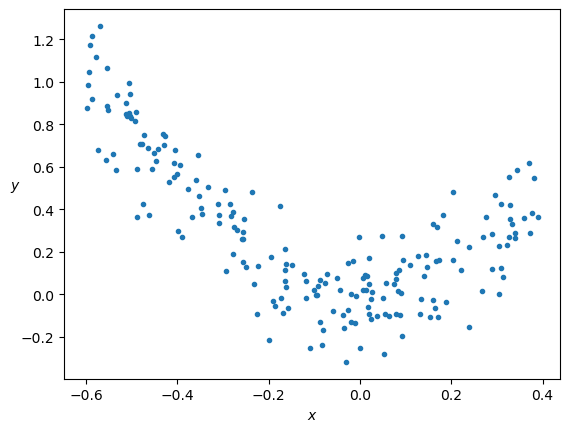

In [17]:
x = np.random.rand(200,1) - 0.6
y = 3 * x[:, 0] ** 2 + 0.15 * np.random.randn(200)
plt.plot(x,y,'.')
plt.xlabel("$x$")
plt.ylabel("$y$",rotation=0)
plt.show()

In [19]:
from sklearn.ensemble import GradientBoostingRegressor


In [21]:
gb_reg = GradientBoostingRegressor(
    max_depth=2,n_estimators=3,learning_rate=1)
gb_reg.fit(x,y)

GradientBoostingRegressor(learning_rate=1, max_depth=2, n_estimators=3)

In [34]:
gb_optimaltrees = GradientBoostingRegressor(
    max_depth=2,learning_rate=0.05,n_estimators=500,
    n_iter_no_change=10
)
gb_optimaltrees.fit(x,y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10)

In [35]:
gb_optimaltrees.n_estimators_

87

In [ ]:
"""So sensitive to learning rate - for learning_rate = 0.06
it outputs gb_optimaltrees.n_estimators_=34 ! """

In [ ]:
"""Although we set 500 trees early stopping with n_iter_no_change
 tells us that the actual number of estimators are 87 !
 let's plot both below"""

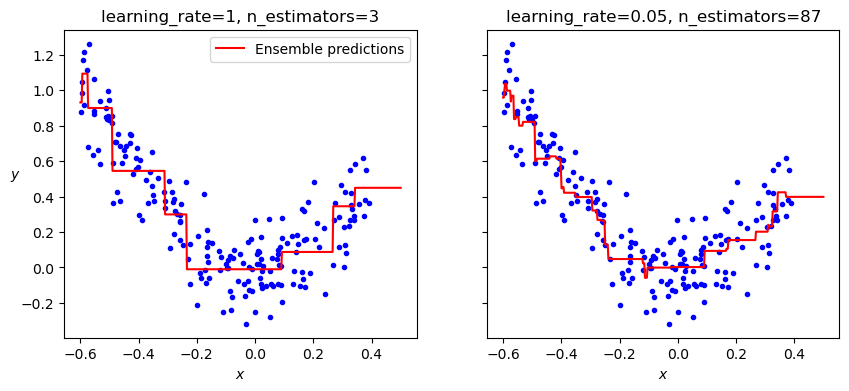

In [68]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
for i in range(2):
    plt.sca(axes[i])
    plt.plot(x,y,'.b')
    plt.xlabel("$x$")
    
x_topredict = np.linspace(-0.6,0.5,500).reshape(-1,1)
y_predicted = gb_reg.predict(x_topredict)
y_pred_opt = gb_optimaltrees.predict(x_topredict)
plt.sca(axes[0])
plt.plot(x_topredict,y_predicted,"r-",label="Ensemble predictions")
plt.title(f"learning_rate={gb_reg.learning_rate}, "
          f"n_estimators={gb_reg.n_estimators_}")
plt.ylabel("$y$", rotation=0)
plt.legend()
plt.sca(axes[1])
plt.title(f"learning_rate={gb_optimaltrees.learning_rate}, "
          f"n_estimators={gb_optimaltrees.n_estimators_}")
plt.plot(x_topredict,y_pred_opt,'-r')
plt.show()